In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn import metrics

X = pd.read_csv('train_data.csv')
y = pd.read_csv('train_label.csv')

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=695)

forest = RandomForestClassifier(random_state=695)   
cv_results = cross_validate(forest, X_train, y_train, cv=5)
cv_results['test_score']

array([0.72765173, 0.72492239, 0.72786167, 0.72766672, 0.72454336])

In [3]:
clf = RandomForestClassifier(random_state=695)   
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7341699258583871

In [4]:
print(metrics.classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     41577
           1       0.73      0.75      0.74     41777

    accuracy                           0.73     83354
   macro avg       0.73      0.73      0.73     83354
weighted avg       0.73      0.73      0.73     83354



In [5]:
forest_pred = clf.predict_proba(X_test)
series1 = pd.DataFrame(forest_pred)[1]

forest_pred

array([[0.7       , 0.3       ],
       [0.71333333, 0.28666667],
       [0.73      , 0.27      ],
       ...,
       [0.14      , 0.86      ],
       [0.01      , 0.99      ],
       [0.23      , 0.77      ]])

In [6]:
clf = GradientBoostingClassifier(random_state=695)   
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6832185617966744

In [7]:
g_boost_pred = clf.predict_proba(X_test)
series2 = pd.DataFrame(g_boost_pred)[1]

In [8]:
clf = AdaBoostClassifier(random_state=695)   
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6701538018571395

In [9]:
ada_pred = clf.predict_proba(X_test)
series3 = pd.DataFrame(ada_pred)[1]

In [10]:
model = lgb.LGBMClassifier(learning_rate=0.1,max_depth=-1,random_state=694)

model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],verbose = 20)

[20]	training's binary_logloss: 0.589889	valid_0's binary_logloss: 0.590776
[40]	training's binary_logloss: 0.5755	valid_0's binary_logloss: 0.577239
[60]	training's binary_logloss: 0.568282	valid_0's binary_logloss: 0.571229
[80]	training's binary_logloss: 0.563315	valid_0's binary_logloss: 0.567961
[100]	training's binary_logloss: 0.559364	valid_0's binary_logloss: 0.565641


LGBMClassifier(random_state=694)

In [11]:
model.score(X_train,y_train), model.score(X_test,y_test)

(0.7013352768629991, 0.6956714734745783)

In [12]:
print(metrics.classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68     41577
           1       0.68      0.73      0.71     41777

    accuracy                           0.70     83354
   macro avg       0.70      0.70      0.70     83354
weighted avg       0.70      0.70      0.70     83354



In [13]:
light_pred = model.predict_proba(X_test)
series4 = pd.DataFrame(light_pred)[1]

In [14]:
df = pd.DataFrame()

df['randomforest_pred'] = series1
df['gboost_pred'] = series2
df['adaboost_pred'] = series3
df['lightgbm_pred'] = series4
df['true_label'] = y_test.reset_index()['label']

df.to_csv('predict_proba.csv',index=False)
df.head()

# save the predicted probabilities of instances along with the true labels for failure analysis

,randomforest_pred,gboost_pred,adaboost_pred,lightgbm_pred,true_label
0,0.300000,0.192014,0.493285,0.237271,0
1,0.286667,0.387071,0.496220,0.394508,0
2,0.270000,0.340027,0.498010,0.261894,0
3,0.310000,0.341312,0.496605,0.291639,0
4,0.000000,0.182456,0.496262,0.028853,0


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

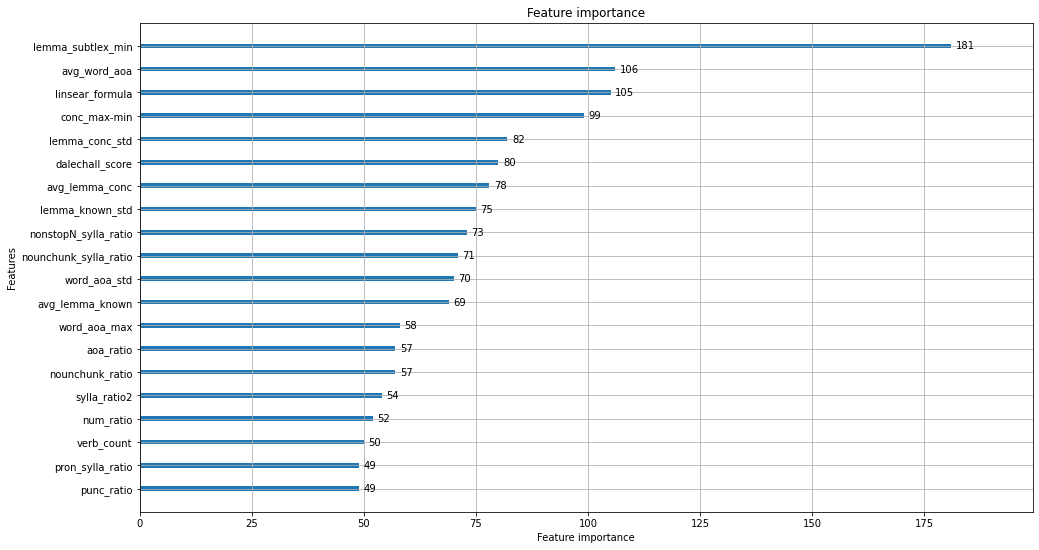

In [15]:
lgb.plot_importance(model, max_num_features = 20, figsize=(16,9))

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

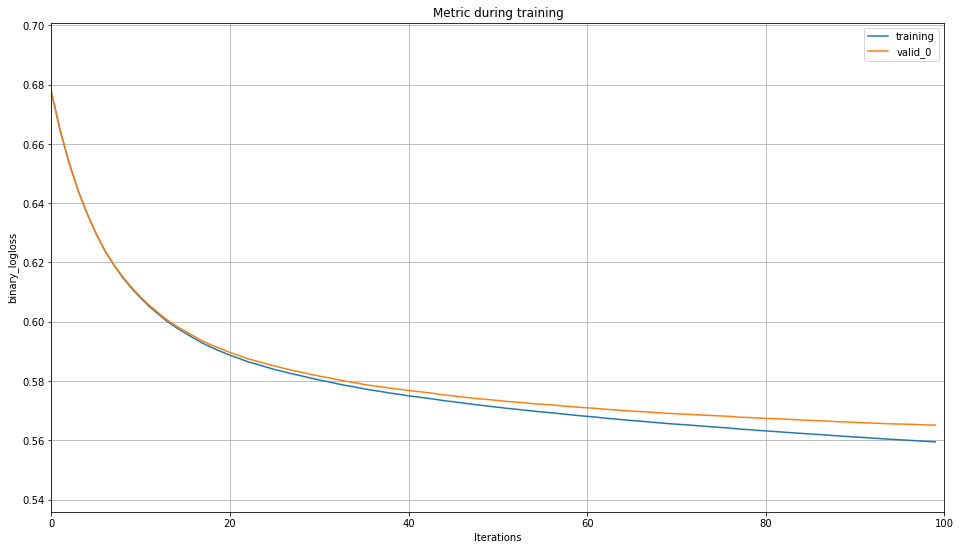

In [16]:
lgb.plot_metric(model,figsize=(16,9))